In [2]:
### ---- Import Libraries ---- ###

from zlib import crc32
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### ---- Read Data Files and Make a 3rd Data File ---- ###

# Read in training data csv file and check head
w_Train = pd.read_csv("trainingData.csv", sep=",")
w_Validate = pd.read_csv("validationData.csv", sep=",")

In [4]:
f_Train = w_Train.copy() #(19937, 529)
f_Validate = w_Validate.copy() #(1111, 529)

In [5]:
### ---- Select / Filter Buildings using Loc function ---- ###
#Min = 0, max = 2

building_0 = f_Train.loc[w_Train['BUILDINGID'] == 0]
building_1 = f_Train.loc[w_Train['BUILDINGID'] == 1]
building_2 = f_Train.loc[w_Train['BUILDINGID'] == 2]


building_0_val = f_Validate.loc[w_Validate['BUILDINGID'] == 0]
building_1_val = f_Validate.loc[w_Validate['BUILDINGID'] == 1]
building_2_val = f_Validate.loc[w_Validate['BUILDINGID'] == 2]

In [6]:
### ---- Filtering on Floor Number for each building ---- ###

# Now filter by Floor Number - later this will be put in a Get_Floor function

###### TRAINING SET ONLY

## Buiding 0: 
b0_f0 = building_0.loc[building_0['FLOOR'] == 0]
b0_f1 = building_0.loc[building_0['FLOOR'] == 1]
b0_f2 = building_0.loc[building_0['FLOOR'] == 2]
b0_f3 = building_0.loc[building_0['FLOOR'] == 3]

## Buiding 1: 
b1_f0 = building_1.loc[building_1['FLOOR'] == 0]
b1_f1 = building_1.loc[building_1['FLOOR'] == 1]
b1_f2 = building_1.loc[building_1['FLOOR'] == 2]
b1_f3 = building_1.loc[building_1['FLOOR'] == 3]
b1_f4 = building_1.loc[building_1['FLOOR'] == 4]

## Buiding 2: 
b2_f0 = building_2.loc[building_2['FLOOR'] == 0]
b2_f1 = building_2.loc[building_2['FLOOR'] == 1]
b2_f2 = building_2.loc[building_2['FLOOR'] == 2]
b2_f3 = building_2.loc[building_2['FLOOR'] == 3]
b2_f4 = building_2.loc[building_2['FLOOR'] == 4]

###### VALIDATION SET ONLY

## Buiding 0: 
b0_f0_val = building_0_val.loc[building_0_val['FLOOR'] == 0]
b0_f1_val = building_0_val.loc[building_0_val['FLOOR'] == 1]
b0_f2_val = building_0_val.loc[building_0_val['FLOOR'] == 2]
b0_f3_val = building_0_val.loc[building_0_val['FLOOR'] == 3]

## Buiding 1: 
b1_f0_val = building_1_val.loc[building_1_val['FLOOR'] == 0]
b1_f1_val = building_1_val.loc[building_1_val['FLOOR'] == 1]
b1_f2_val = building_1_val.loc[building_1_val['FLOOR'] == 2]
b1_f3_val = building_1_val.loc[building_1_val['FLOOR'] == 3]
b1_f4_val = building_1_val.loc[building_1_val['FLOOR'] == 4]

## Buiding 2: 
b2_f0_val = building_2_val.loc[building_2_val['FLOOR'] == 0]
b2_f1_val = building_2_val.loc[building_2_val['FLOOR'] == 1]
b2_f2_val = building_2_val.loc[building_2_val['FLOOR'] == 2]
b2_f3_val = building_2_val.loc[building_2_val['FLOOR'] == 3]
b2_f4_val = building_2_val.loc[building_2_val['FLOOR'] == 4]

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.colors as col

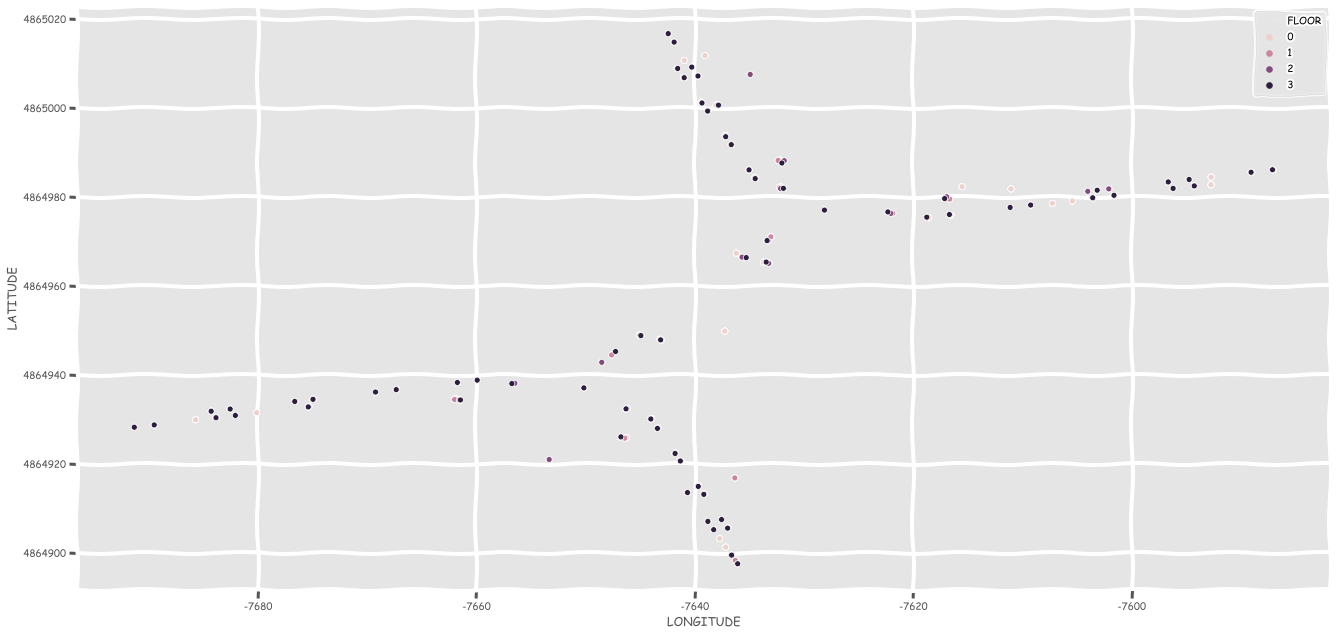

In [160]:
#### ----  BUILDING 0 - MAPPING BY LONGITUDE AND LATITUDE ---- ####

sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='FLOOR', data=building_0)
plt.rcParams["figure.figsize"] = (20,10)

TypeError: 'str' object is not callable

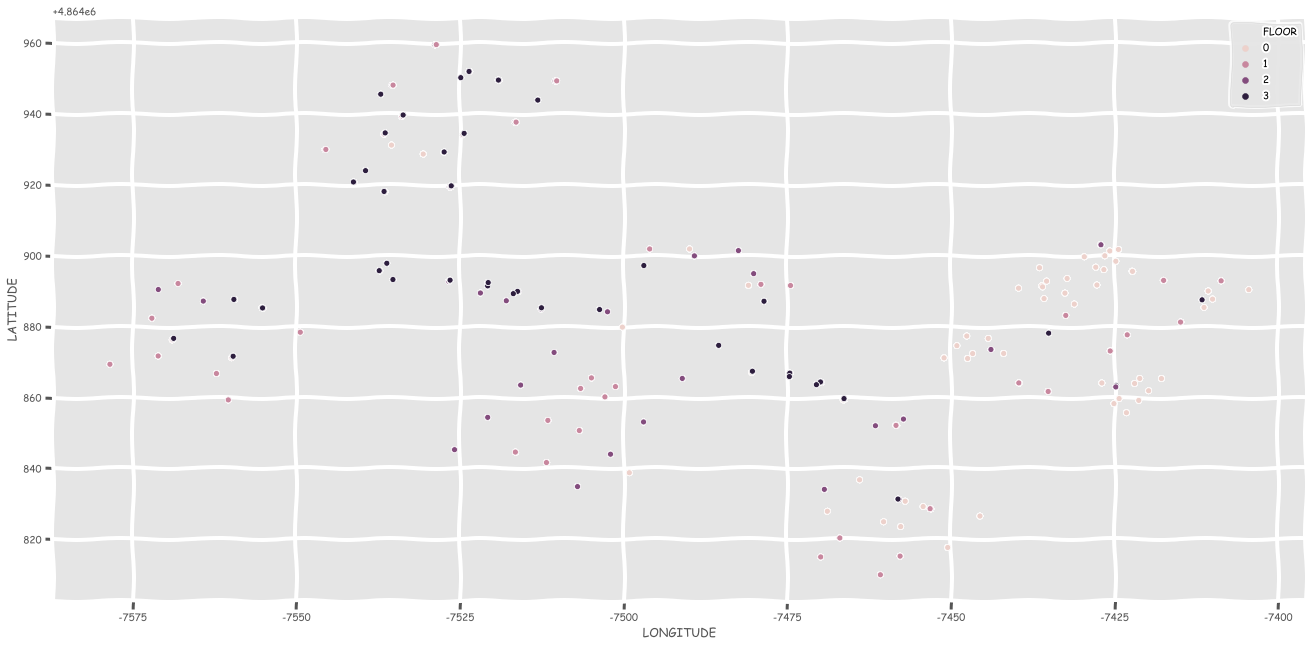

In [213]:
#### ----  BUILDING 1 - MAPPING BY LONGITUDE AND LATITUDE ---- ####

sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='FLOOR', data=building_1)
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Building Layout")

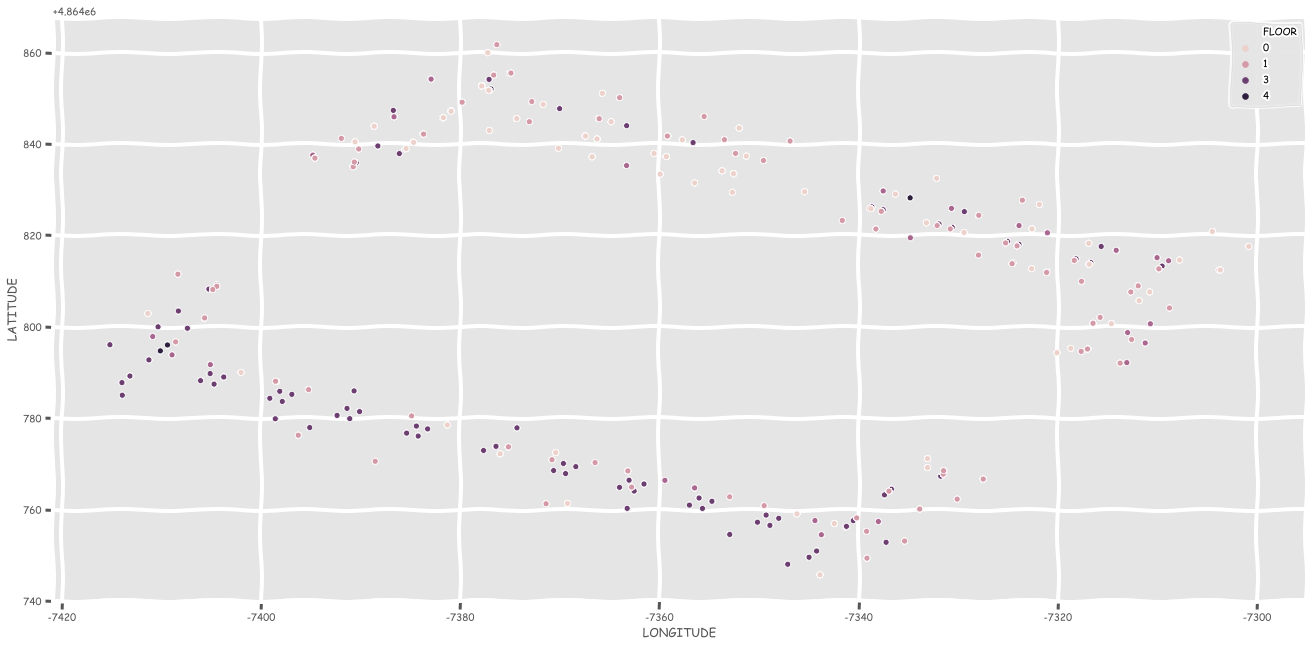

In [161]:
#### ----  BUILDING 2 - MAPPING BY LONGITUDE AND LATITUDE ---- ####

sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='FLOOR', data=building_2)
plt.rcParams["figure.figsize"] = (20,10)

In [11]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = building_2.iloc[:, 0:520] # WAP columns
y = building_2.loc[:, "LONGITUDE"] #  Target column

In [12]:
#### ----  GENERIC MODEL PREPROCESSING ---- ###

## TRAIN TEST SPLIT

## Splitting into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
#### ---- REGRESSION: LINEAR REGRESSION ---- ###

from sklearn.linear_model import LinearRegression

## Fitting Linear Regression to the Training Set
lm_reg = LinearRegression()
lm_reg.fit(X_train, y_train)

## Predicting the Test set results
y_pred = lm_reg.predict(X_test)

## Error Metrics
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score

## Assigning the Error Metrics to a variable
mse = round(mean_squared_error(y_test, y_pred), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_test, y_pred))
r2 = round(r2_score(y_test, y_pred), 4)



In [14]:
## Here are the Error Metrics

print("Mean Square Error:", mse, sep="\n")
print("********************")
print("Root Mean Square Error:", rmse, sep="\n")
print("********************")
print("Mean Absolute Error:", mae, sep="\n")
print("********************")
print("R2 Correlation:", r2, sep="\n")
print("********************")


Mean Square Error:
205.0814
********************
Root Mean Square Error:
14.3207
********************
Mean Absolute Error:
11.0
********************
R2 Correlation:
0.7749
********************


TypeError: 'str' object is not callable

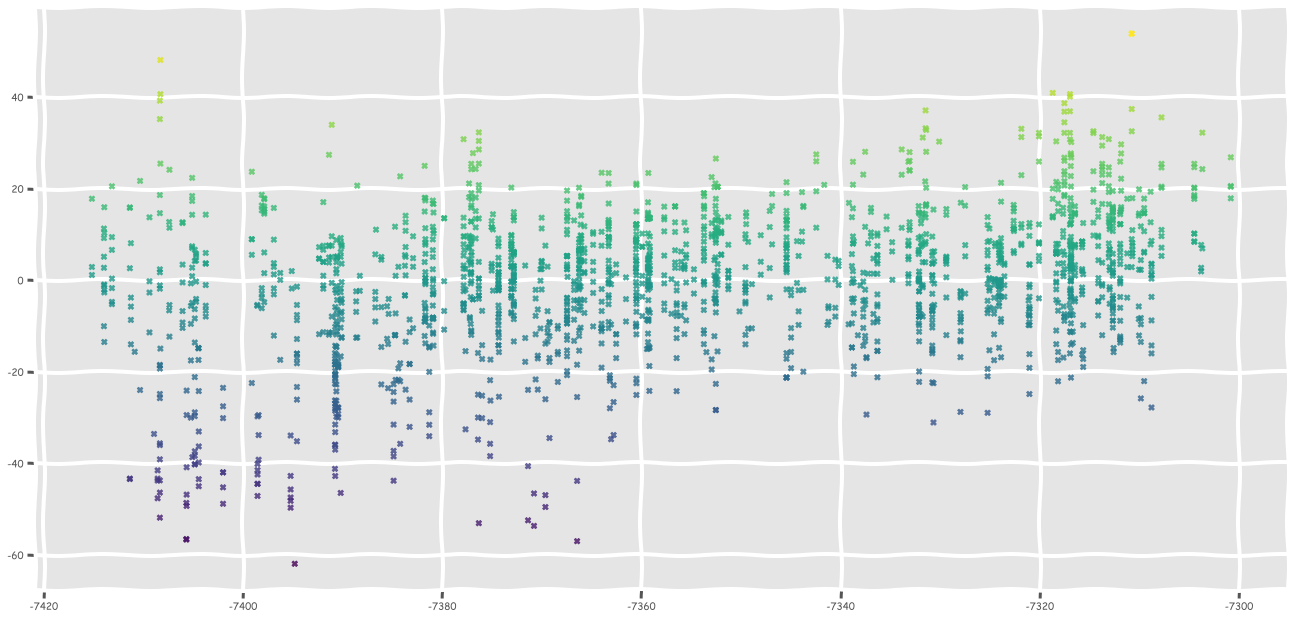

In [211]:
### ---- ERROR VISUALISATION: PLOTTING RESIDUALS ---- ###

## This chart is good at showing error dispersion, but lacks a sense of the density

from matplotlib import pyplot as plt
import seaborn as sns

## Plot style - DC comics (Zero Gravity)

plt.style.use('ggplot')
#plt.xkcd()


## Selecting the type and character of the chart

plt.scatter(y_test, y_residual, marker = 'X', c=y_residual, alpha=0.8, label = "Residuals" ) 

## Setting Aesthetics and Labelling


plt.title("Error Visualisation - Error dispersion at different Longitude") ## Giving the plot a sensible title
plt.xlabel("Longitude") # x axis label
plt.ylabel("Redisuals") # y axis label
plt.ticklabel_format() # tickmarks
plt.legend() # show a legend
plt.tight_layout() # Tighten the layout and remove space
plt.grid(False) ## Adds grid lines
ax.scatter(x,y,marker='o')



## Customising the color and colorbar to reflect the dispersion from 0
#plt.colorbar(ticks=range(10), label='Residuals')
#plt.colorbar(label='log$_{10}$(y_residual)', ticks=range(100))
plt.colorbar(label='Residuals')

#plt.clim(1,20)

plt.savefig('Residual Plotting.png')
plt.show()


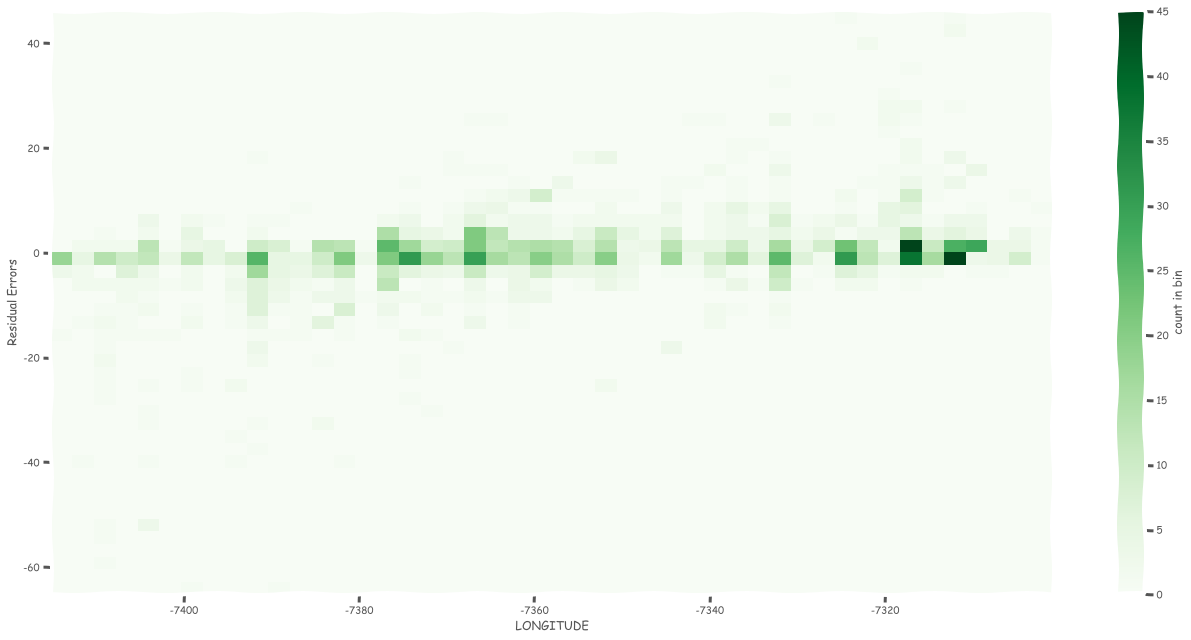

In [182]:
### ---- ERROR VISUALISATION: PLOTTING RESIDUALS version 2 ---- ###

## Using Two Dimensional Binnings with a Colorbar

plt.style.use('ggplot')

## Setting variables
x=y_test
y=y_residual

## Setting Aesthetics and Labelling
plt.hist2d(x, y, bins=46, cmap='Greens')
plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

plt.xlabel("LONGITUDE")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
#plt.legend()
#plt.tight_layout()
plt.grid(True) ## Adds grid lines


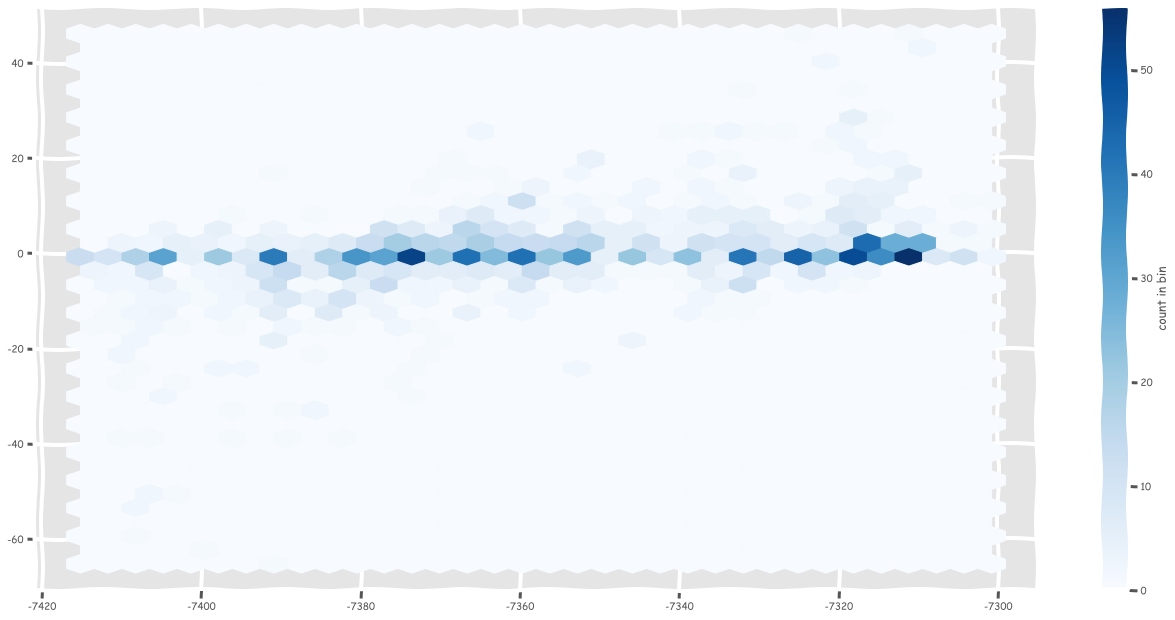

In [184]:
## Using Hexagonal Binnings with a Colorbar

plt.style.use('ggplot')
plt.hexbin(x, y, gridsize=33, cmap='Blues')
cb = plt.colorbar(label='count in bin')

TypeError: 'str' object is not callable

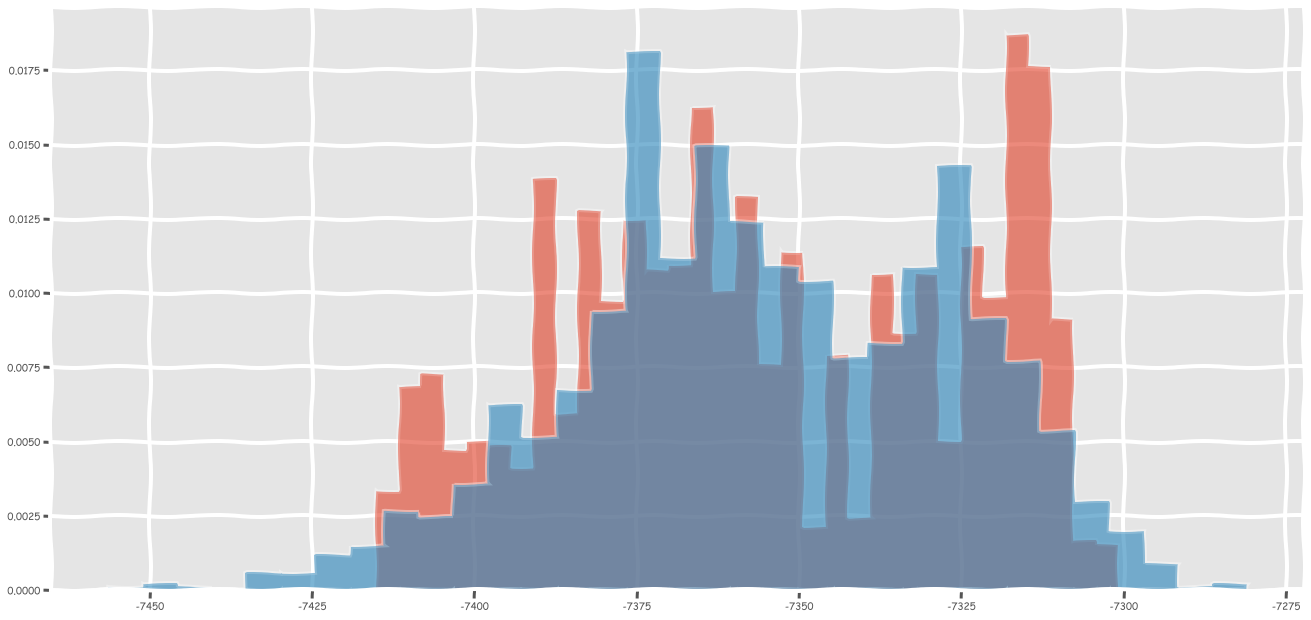

In [199]:
### ---- ERROR VISUALISATION: PLOTTING RESIDUALS USING DENSITY ---- ###

## Setting variables

x1 = y_test
x2 = y_pred
x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(histtype='stepfilled', density=True, alpha=0.4, bins=33)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("LONGITUDE")
plt.ylabel("Residual Errors")



plt.hist(x1, **kwargs) ## Actual Coordinates
plt.hist(x2, **kwargs) ## Predicted Coordinates

plt.xlabel("LONGITUDE")
plt.ylabel("Residual Errors")





In [193]:
#### ---- REGRESSION: SVM v1 ---- ###

from sklearn.svm import LinearSVR

## Fitting Linear Regression to the Training Set
svr_reg = LinearSVR(
            epsilon=0.0,
            tol=0.0001,
            C=10,
            loss='epsilon_insensitive',
            fit_intercept=True,
            intercept_scaling=1.0,
            dual=True,
            verbose=0,
            random_state=42,
            max_iter=1000,
)
svr_reg.fit(X_train, y_train)

## Predicting the Test set results
y_pred = svr_reg.predict(X_test)

## Error Metrics
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score

## Assigning the Error Metrics to a variable
mse = round(mean_squared_error(y_test, y_pred), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_test, y_pred))
r2 = round(r2_score(y_test, y_pred), 4)



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
## Here are the Error Metrics

print("Mean Square Error:", mse, sep="\n")
print("********************")
print("Root Mean Square Error:", rmse, sep="\n")
print("********************")
print("Mean Absolute Error:", mae, sep="\n")
print("********************")
print("R2 Correlation:", r2, sep="\n")
print("********************")


Mean Square Error:
240.2738
********************
Root Mean Square Error:
15.5008
********************
Mean Absolute Error:
12.0
********************
R2 Correlation:
0.7362
********************


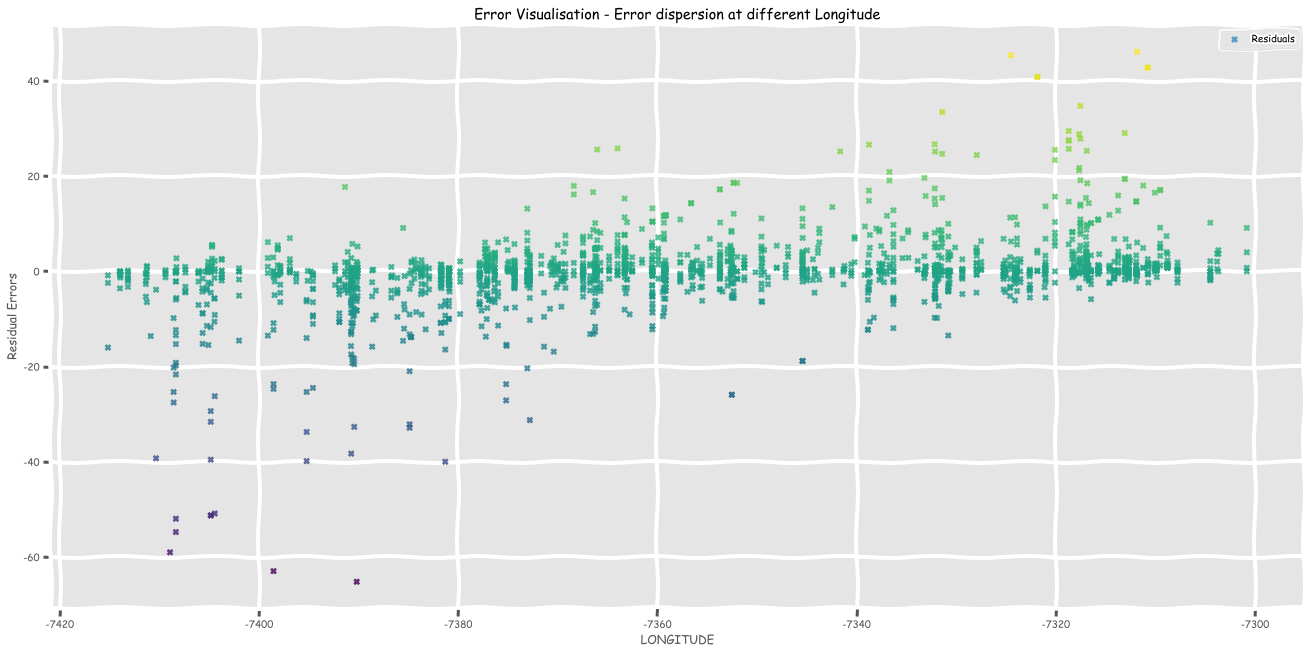

In [98]:

### ---- ERROR VISUALISATION: PLOTTING RESIDUALS ---- ###

from matplotlib import pyplot as plt
import seaborn as sns

## Plot style - DC comics (Zero Gravity)

plt.style.use('ggplot')
#plt.xkcd()

y_residual = y_test - y_pred

plt.scatter(y_test, y_residual, alpha=0.8, marker = 'X', c=y_residual, label = "Residuals")

plt.title("Error Visualisation - Error dispersion at different Longitude")
plt.xlabel("LONGITUDE")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
plt.legend()
#plt.tight_layout(False)
plt.grid(True) ## Adds grid lines

plt.savefig('Residual Plotting.png')


Text(0, 0.5, 'Residual Errors')

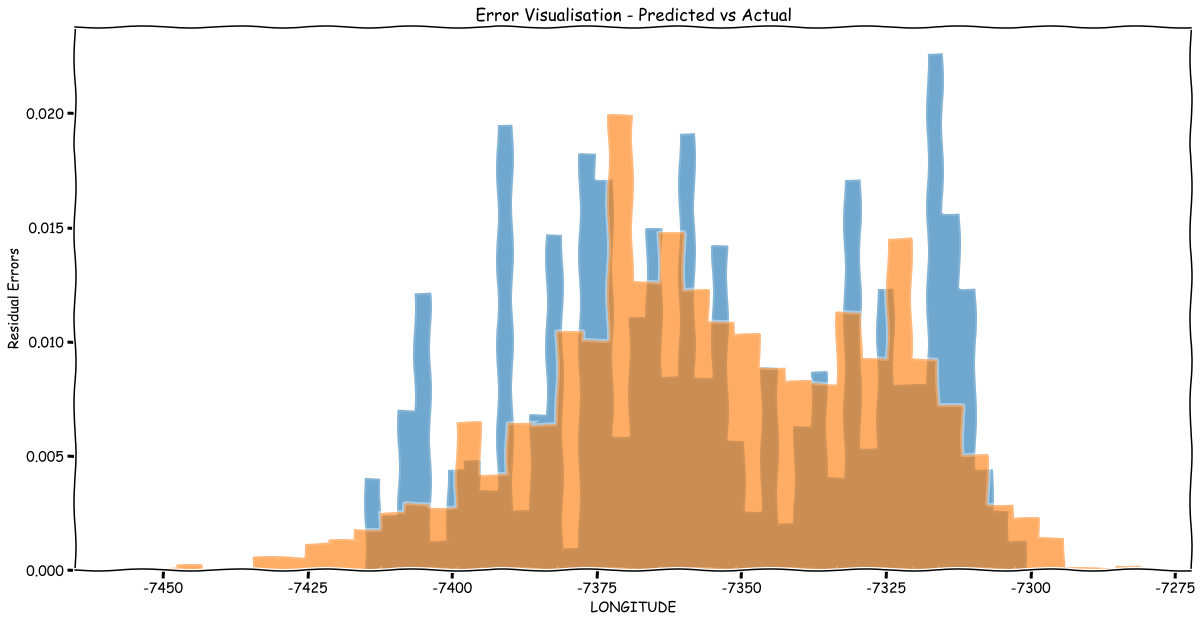

In [20]:
### ---- ERROR VISUALISATION: PLOTTING RESIDUALS USING DENSITY ---- ###

x1 = y_test
x2 = y_pred

kwargs = dict(histtype='stepfilled', density=True, alpha=0.4, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("LONGITUDE")
plt.ylabel("Residual Errors")



In [21]:
#### ---- REGRESSION: SVM 2 ---- ###

from sklearn.svm import NuSVR

## Fitting Linear Regression to the Training Set
nusvr_reg = NuSVR()
nusvr_reg.fit(X_train, y_train)

## Predicting the Test set results
y_pred = nusvr_reg.predict(X_test)

## Error Metrics
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score

## Assigning the Error Metrics to a variable
mse = round(mean_squared_error(y_test, y_pred), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_test, y_pred))
r2 = round(r2_score(y_test, y_pred), 4)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
## Here are the Error Metrics

print("Mean Square Error:", mse, sep="\n")
print("********************")
print("Root Mean Square Error:", rmse, sep="\n")
print("********************")
print("Mean Absolute Error:", mae, sep="\n")
print("********************")
print("R2 Correlation:", r2, sep="\n")
print("********************")

Mean Square Error:
895.1707
********************
Root Mean Square Error:
29.9194
********************
Mean Absolute Error:
26.0
********************
R2 Correlation:
0.0173
********************


Text(0, 0.5, 'Residual Errors')

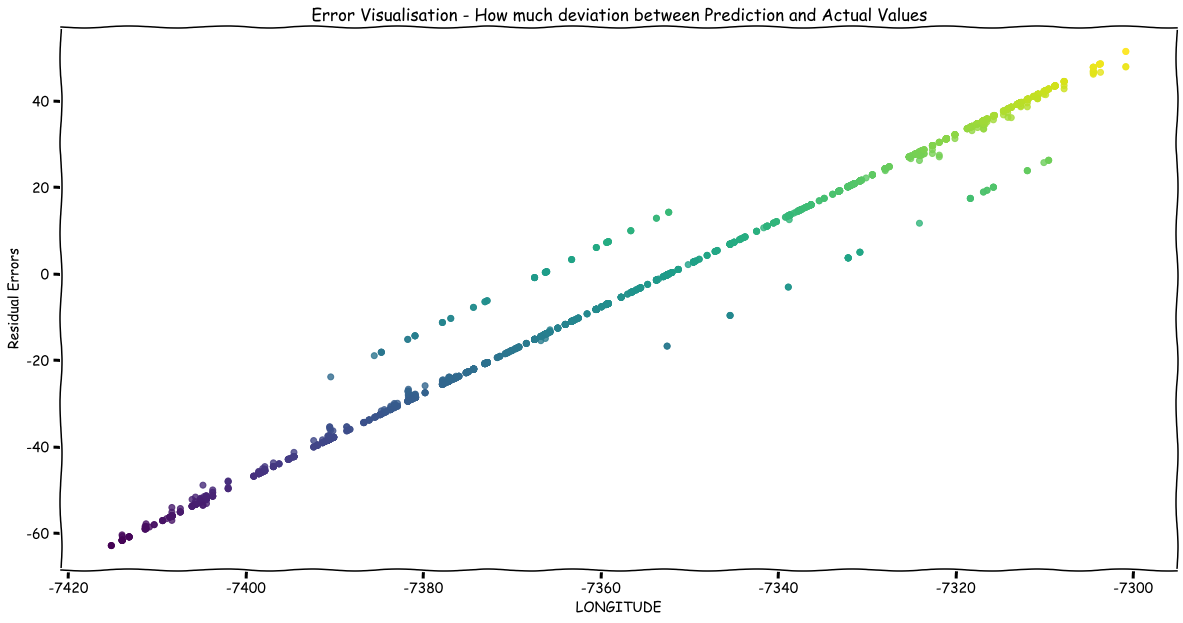

In [23]:
### ---- ERROR VISUALISATION: PLOTTING RESIDUALS ---- ###

y_residual = y_test - y_pred

plt.scatter(y_test, y_residual, alpha=0.8, c=y_residual)
plt.title("Error Visualisation - How much deviation between Prediction and Actual Values")
plt.xlabel("LONGITUDE")
plt.ylabel("Residual Errors")



Text(0, 0.5, 'Residual Errors')

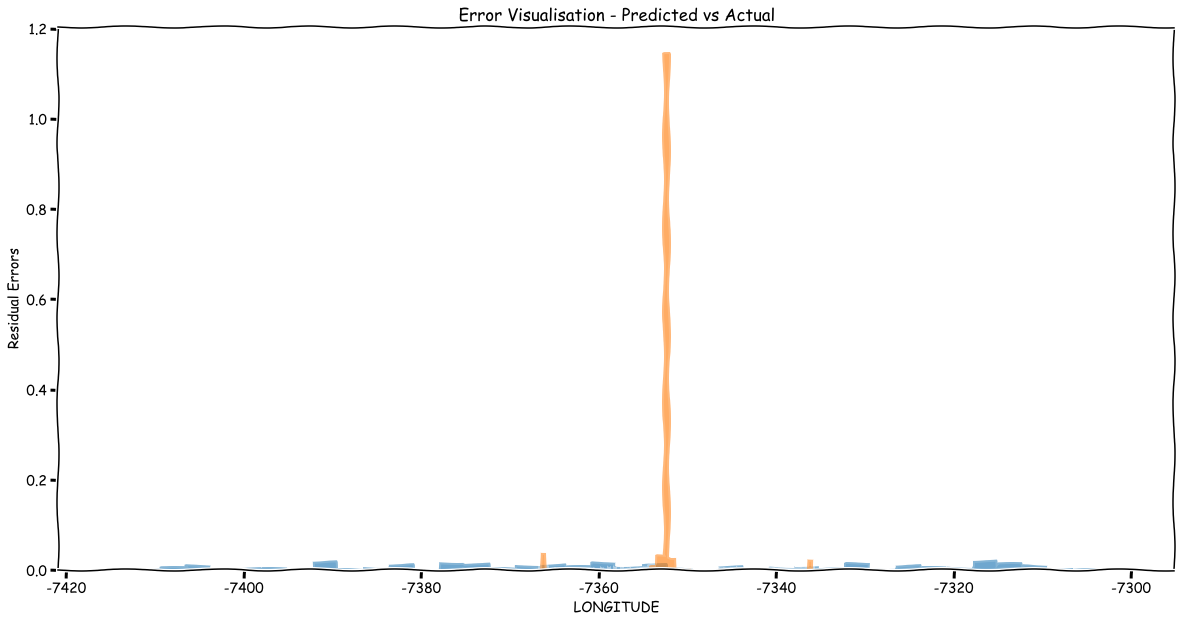

In [24]:
### ---- ERROR VISUALISATION: PLOTTING RESIDUALS USING DENSITY ---- ###

x1 = y_test
x2 = y_pred

kwargs = dict(histtype='stepfilled', density=True, alpha=0.4, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("LONGITUDE")
plt.ylabel("Residual Errors")


In [25]:
#### ---- REGRESSION: RANDOM FOREST ---- ###

from sklearn.ensemble import RandomForestRegressor


## Fitting Linear Regression to the Training Set
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

## Predicting the Test set results
y_pred = rf_reg.predict(X_test)

## Error Metrics
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score

## Assigning the Error Metrics to a variable
mse = round(mean_squared_error(y_test, y_pred), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_test, y_pred))
r2 = round(r2_score(y_test, y_pred), 4)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
## Here are the Error Metrics

print("Mean Square Error:", mse, sep="\n")
print("********************")
print("Root Mean Square Error:", rmse, sep="\n")
print("********************")
print("Mean Absolute Error:", mae, sep="\n")
print("********************")
print("R2 Correlation:", r2, sep="\n")
print("********************")

Mean Square Error:
66.4268
********************
Root Mean Square Error:
8.1503
********************
Mean Absolute Error:
4.0
********************
R2 Correlation:
0.9271
********************


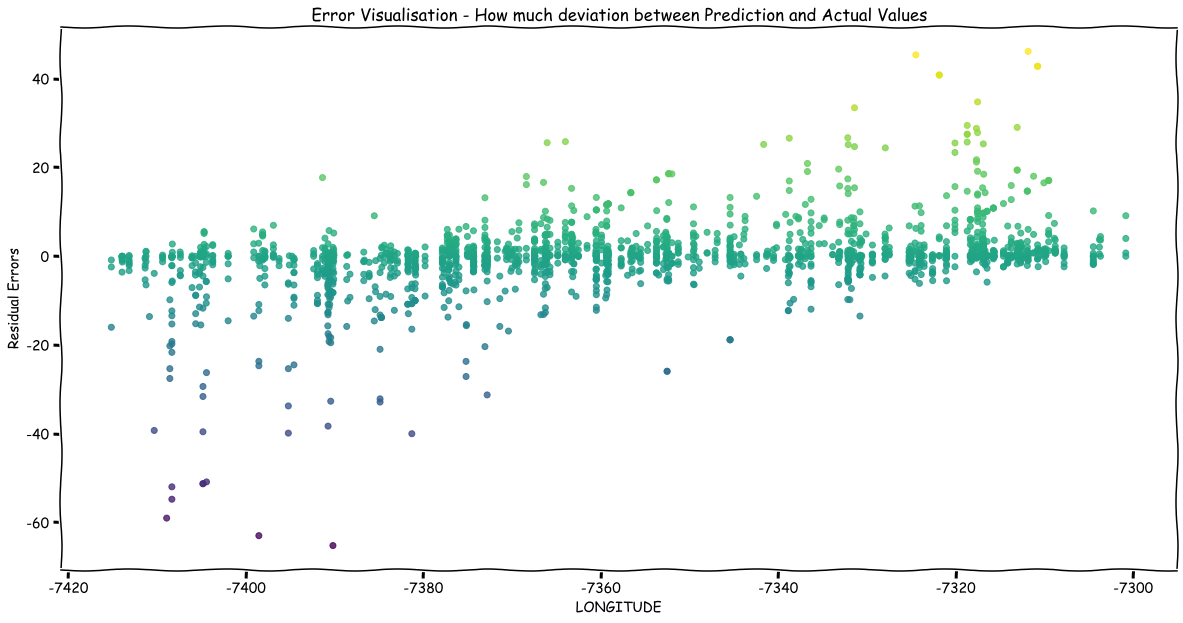

In [27]:
### ---- ERROR VISUALISATION: PLOTTING RESIDUALS ---- ###

y_residual = y_test - y_pred

plt.scatter(y_test, y_residual, alpha=0.8, c=y_residual)
plt.title("Error Visualisation - How much deviation between Prediction and Actual Values")
plt.xlabel("LONGITUDE")
plt.ylabel("Residual Errors")
plt.show()


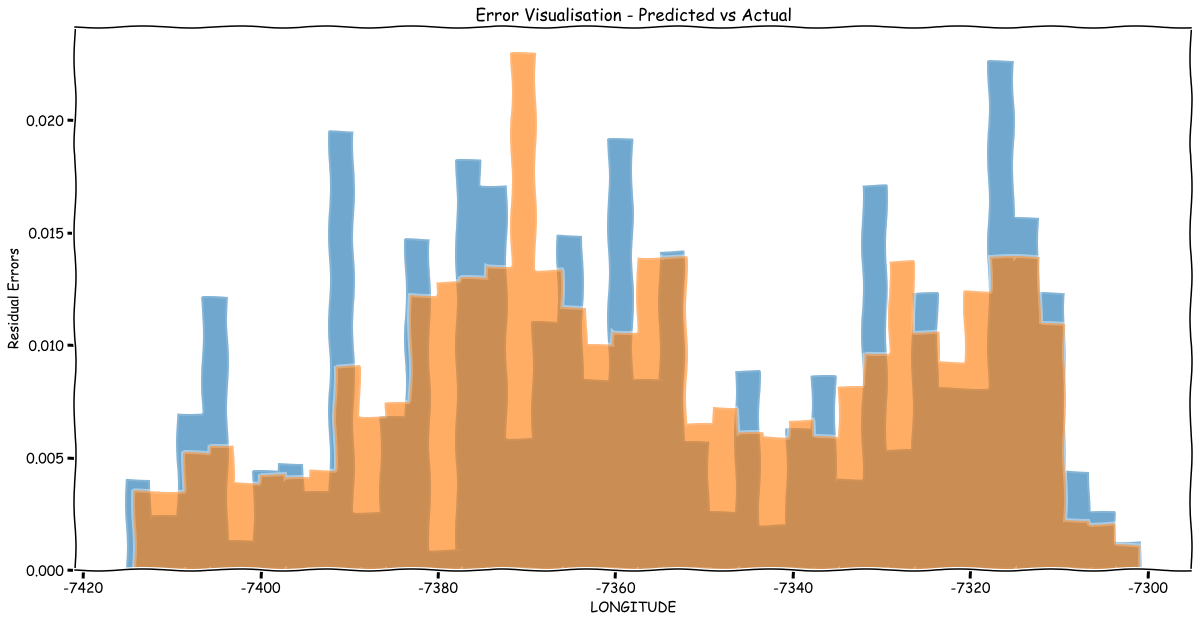

In [28]:
### ---- ERROR VISUALISATION: PLOTTING RESIDUALS USING DENSITY ---- ###

x1 = y_test
x2 = y_pred

kwargs = dict(histtype='stepfilled', density=True, alpha=0.4, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("LONGITUDE")
plt.ylabel("Residual Errors")
plt.show()